# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import statistics as st

In [3]:
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

In [4]:
pca = PCA(n_components=10)
knn = KNeighborsClassifier(n_neighbors=10)
model = make_pipeline(pca, knn)
model.fit(X_train, y_train)
Y_test_predictions = model.predict(X_test)
print(len(Y_test_predictions))
print(len(y_test))
a = confusion_matrix(y_test, Y_test_predictions)
print(a)

14000
14000
[[1347    1    1    2    4    8   10    0    4    3]
 [   1 1611    7    4    0    2    3    1    2    1]
 [  16    1 1358    7    5    3   12   16   14    1]
 [   5    6   24 1236    3   23    9   16   93   16]
 [   1    4   10    2 1193    3   11    6    2   96]
 [  15    1    5   28    6 1192   15    2   18   15]
 [   9    0   10    0    3   12 1292    0    3    2]
 [   2   15    5    1   12    2    0 1363    4   40]
 [   6   10   10   31    6   45    8    2 1210   23]
 [   4    9    2   17   77    6    7   37   15 1199]]


c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

In [5]:
test_history = []
train_history = []
k_range = range(1,21)
for k in k_range:
    pca = PCA(n_components=10)
    knn = KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(pca, knn)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1 = model.predict(X_train)
    a = metrics.accuracy_score(y_train, y_pred1)
    train_history.append(a)
    b = metrics.accuracy_score(y_test, y_pred)
    test_history.append(b)
    

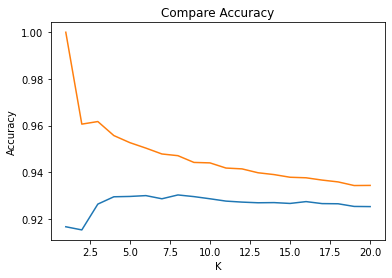

In [6]:
plt.plot(k_range, test_history)
plt.plot(k_range, train_history)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Compare Accuracy')
plt.show()

From this picture, we can get when K is equal to 5, we have optimal results. Because test set have a better accuracy than others and less expensive

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

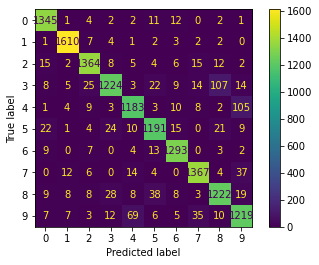

In [7]:
pca = PCA(n_components=10)
knn = KNeighborsClassifier(n_neighbors=5)
model = make_pipeline(pca, knn)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_test = y_test.reshape(-1,1)

plot_confusion_matrix(model, X_test, y_test) 
plt.show()

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

In [20]:
row_num = np.random.randint(0,70000,3000)
X_random = X[[row_num]]
y_random = y[[row_num]]

D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
D:\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_random, y_random, test_size=0.2, random_state=1)

In [24]:
knn = KNeighborsClassifier()
k_range = list(range(1,21))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn,param_grid,cv=10,scoring = 'accuracy',return_train_score = True)
grid_search = grid.fit(X_train_random,y_train_random)

In [25]:
test_result = []
train_result = []
for i in range(10):
    group_test = f"split{i}_test_score"
    group_train = f"split{i}_train_score"
    test_result.append(st.mean(grid.cv_results_[group_test]))
    train_result.append(st.mean(grid.cv_results_[group_train]))

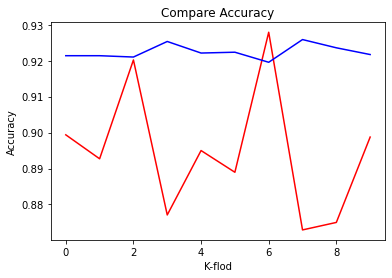

In [26]:
plt.plot(test_result,'r',label = 'test accuracy')
plt.plot(train_result,'b',label = 'train accuracy')
plt.xlabel('K-flod')
plt.ylabel('Accuracy')
plt.title('Compare Accuracy')
plt.show()

Similarities: 1. When K is getting larger, accuracy is getting lower 2. Accuracy gets apex value at a certain K. After this K, accuracy decrease.
Differences: In(c), accuracy apex value gets at K=5, in(e), K=3.

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

[[33855 18790 52116 51849 37293]]


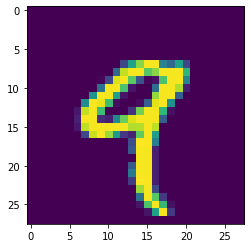

In [27]:
im = np.array(X[4])
im = im.reshape(28, 28)
plt.imshow(im)

model_f = KNeighborsClassifier(n_neighbors=5)
model_f.fit(X_train, y_train)

a = X[4].reshape(1,-1)
y_pred_x1 = model_f.predict(a)
nearest = model_f.kneighbors(a,5,return_distance=False)
print(nearest)


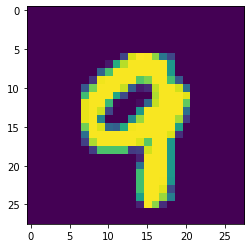

In [44]:
im1 = np.array(X[33855])
im1 = im1.reshape(28, 28)
plt.imshow(im1)

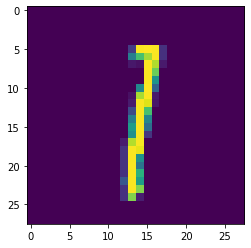

In [50]:
im2 = np.array(X[18790])
im2 = im2.reshape(28, 28)
plt.imshow(im2)

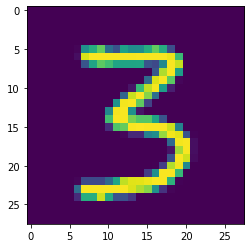

In [51]:
im3 = np.array(X[52116])
im3 = im3.reshape(28, 28)
plt.imshow(im3)

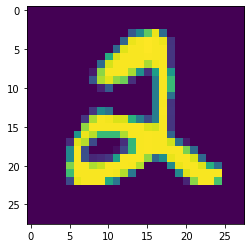

In [52]:
im4 = np.array(X[51849])
im4 = im4.reshape(28, 28)
plt.imshow(im4)

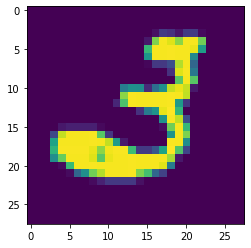

In [53]:
im5 = np.array(X[37293])
im5 = im5.reshape(28, 28)
plt.imshow(im5)

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

In [41]:
pca = PCA(n_components=10)
pca_x = pca.fit_transform(X_train_random)

In [42]:
knn = KNeighborsClassifier()
k_range = list(range(1,21))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn,param_grid,cv=10,scoring = 'accuracy',return_train_score = True)
grid_search = grid.fit(pca_x,y_train_random)

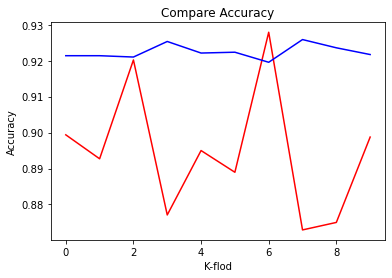

In [43]:
plt.plot(test_result,'r',label = 'test accuracy')
plt.plot(train_result,'b',label = 'train accuracy')
plt.xlabel('K-flod')
plt.ylabel('Accuracy')
plt.title('Compare Accuracy')
plt.show()

Because target has 10 labels, so we choose 10 as our dimension

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

Combine(a) and (b) together 

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [3]:
def read_dataset(data_link):
    data = pd.read_csv(data_link, index_col=0)
    # handle missing values
    data = data.fillna(0)
    data['Age']=data['Age'].fillna(data['Age'].mean())
    # handle not so important infos
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    # (b)add some features
    fare = data['Fare']
    ave_fare = st.mean(fare)
    std = st.stdev(fare)
    fare = fare.apply(lambda x: (x - ave_fare)/std)
    
    labels = data['Sex'].unique().tolist()
    data['Sex'] = [*map(lambda x: labels.index(x), data['Sex'])] 
    labels = data['Embarked'].unique().tolist()
    data['Embarked'] = data['Embarked'].apply(lambda n: labels.index(n))

    return data

train = read_dataset("C:\\Users\\JiahuiZhu\\Desktop\\506\\hw4\\train.csv")
test =  read_dataset("C:\\Users\\JiahuiZhu\\Desktop\\506\\hw4\\test.csv")
Y_test = pd.read_csv("C:\\Users\\JiahuiZhu\\Desktop\\506\\hw4\\gender_submission.csv")


b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [76]:
# in(a)

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

In [4]:
y_train = train['Survived'].values 
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values 
y_test = Y_test['Survived'].values 

# tree = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.1, min_samples_leaf=2)
tree = DecisionTreeClassifier(max_depth=5)
tree = tree.fit(x_train,y_train)

y_pred = tree.predict(x_test)

print('train score:', tree.score(x_train, y_train))
print('test score:', tree.score(x_test, y_test))

train score: 0.8473625140291807
test score: 0.9282296650717703


d) Plot the decision tree. Briefly explains how it works. **- 5 points**

[Text(182.466, 199.32, 'X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(105.462, 163.07999999999998, 'X[5] <= 26.269\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(53.568000000000005, 126.83999999999999, 'X[4] <= 0.5\ngini = 0.226\nsamples = 415\nvalue = [361, 54]'),
 Text(26.784000000000002, 90.6, 'X[2] <= 32.5\ngini = 0.184\nsamples = 380\nvalue = [341, 39]'),
 Text(13.392000000000001, 54.359999999999985, 'X[2] <= 30.75\ngini = 0.205\nsamples = 284\nvalue = [251, 33]'),
 Text(6.696000000000001, 18.119999999999976, 'gini = 0.181\nsamples = 268\nvalue = [241, 27]'),
 Text(20.088, 18.119999999999976, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(40.176, 54.359999999999985, 'X[5] <= 7.91\ngini = 0.117\nsamples = 96\nvalue = [90, 6]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(46.87200000000001, 18.119999999999976, 'gini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(80.352, 90.6, 'X[2] <= 12.

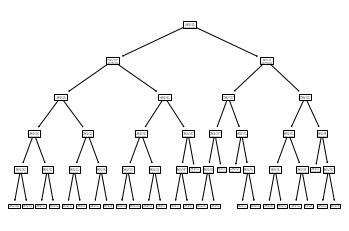

In [5]:
from sklearn.tree import plot_tree
plot_tree(tree)

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

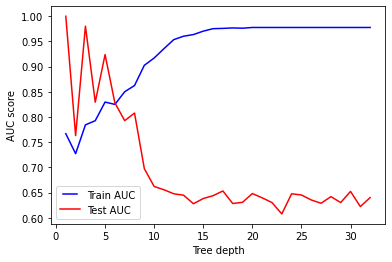

In [8]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

    
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

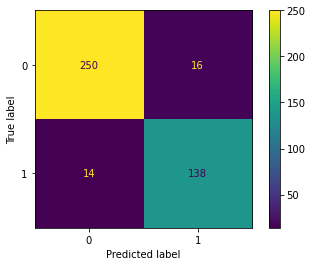

In [9]:
plot_confusion_matrix(tree, x_test,y_test) 
plt.show()

In [10]:
# find which one is false
y_pred[y_pred != y_test]

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [12]:
# find where the first false point walk through. We can know that it walks through 1,32,44,45,49,50 node.
simple_pred = tree.predict(x_test[1].reshape(1, -1))
print(tree.decision_path(x_test[1].reshape(1, -1)).toarray())

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0]]


f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

In [8]:
# try different max_depth
tree_tune1 = DecisionTreeClassifier(max_depth=6)
tree_tune1 = tree_tune1.fit(x_train,y_train)

y_pred_tune = tree_tune1.predict(x_test)

print('train score:', tree_tune1.score(x_train, y_train))
print('test score:', tree_tune1.score(x_test, y_test))

train score: 0.856341189674523
test score: 0.854066985645933


In [10]:
# set min samples leaf to 2, and make max depth same to (c), we can get a better test score!!!
tree_tune2 = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.1, min_samples_leaf=2)
tree_tune2 = tree_tune2.fit(x_train,y_train)

y_pred_tune_2 = tree_tune2.predict(x_test)

print('train score:', tree_tune2.score(x_train, y_train))
print('test score:', tree_tune2.score(x_test, y_test))

train score: 0.7867564534231201
test score: 1.0


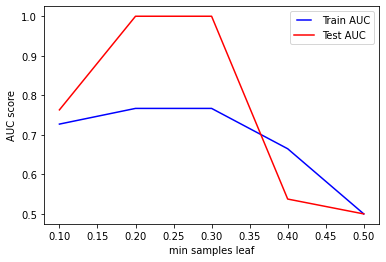

In [13]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

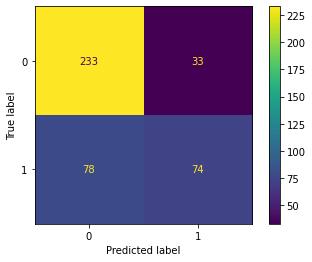

In [14]:
pca_tree = PCA(n_components=5)
tree_redu = DecisionTreeClassifier(max_depth=5)
tree_redu = make_pipeline(pca_tree, tree_redu)
tree_redu = tree_redu.fit(x_train,y_train)

y_pred = tree_redu.predict(x_test)

plot_confusion_matrix(tree_redu, x_test,y_test) 
plt.show()

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [19]:
from decision_tree.decision_tree_model  import ClassificationTree

class Random_Forest():

    def __init__(self, n_estimators=100, min_samples_split=2, min_gain=0,
                 max_depth=float("inf"), max_features=None):

        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.min_gain = min_gain
        self.max_depth = max_depth
        self.max_features = max_features

        self.trees = []
        for _ in range(self.n_estimators):
            tree = ClassificationTree(min_samples_split=self.min_samples_split, min_impurity=self.min_gain,
                                      max_depth=self.max_depth)
            self.trees.append(tree)

    def fit(self, X, Y):
        sub_sets = self.get_bootstrap_data(X, Y)
        n_features = X.shape[1]
        if self.max_features == None:
            self.max_features = int(np.sqrt(n_features))
        for i in range(self.n_estimators):
            sub_X, sub_Y = sub_sets[i]
            idx = np.random.choice(n_features, self.max_features, replace=True)
            sub_X = sub_X[:, idx]
            self.trees[i].fit(sub_X, sub_Y)
            self.trees[i].feature_indices = idx
            print("tree", i, "fit complete")

    def predict(self, X):
        y_preds = []
        for i in range(self.n_estimators):
            idx = self.trees[i].feature_indices
            sub_X = X[:, idx]
            y_pre = self.trees[i].predict(sub_X)
            y_preds.append(y_pre)
        y_preds = np.array(y_preds).T
        y_pred = []
        for y_p in y_preds:
            y_pred.append(np.bincount(y_p.astype('int')).argmax())
        return y_pred

    def get_bootstrap_data(self, X, Y):

        m = X.shape[0]
        Y = Y.reshape(m, 1)
        X_Y = np.hstack((X, Y))
        np.random.shuffle(X_Y)

        data_sets = []
        for _ in range(self.n_estimators):
            idm = np.random.choice(m, m, replace=True)
            bootstrap_X_Y = X_Y[idm, :]
            bootstrap_X = bootstrap_X_Y[:, :-1]
            bootstrap_Y = bootstrap_X_Y[:, -1:]
            data_sets.append([bootstrap_X, bootstrap_Y])
        return 

ModuleNotFoundError: No module named 'decision_tree'

### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [20]:
# write your code here
rf1 = Random_Forest(n_estimators=5, max_features=3, max_depth=10)
rf1.fit(X_train, y_train)

NameError: name 'ClassificationTree' is not defined

### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
